### Wprowadzenie do laboratorium

- środowisko obliczeniowe
- podstawowe biblioteki
- podstawowe opracje na obrazach

Sprawdzenie wersji systemu **Anaconda Python**

In [1]:
import sys
print(sys.version)

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


Sprawdzenie wersji biblioteki **OpenCV**

In [2]:
import cv2
print(cv2.__version__)

3.4.2


Pobranie obrazu testowego z biblioteki **scikit-image**.

Inne obrazy testowe dostępne w bibliotece są dostępne w dokumentacji modułu [data](http://scikit-image.org/docs/dev/api/skimage.data.html).

In [3]:
from skimage import data

im = data.moon()

Wyswietlanie obrazu za pomocą biblioteki **matplotlib**. Kod wielokrotnego użytku umożliwiający parametryzację: rozmiar obrazu (*figsize*) oraz mapa kolorystyczna (cmap). 

Dostepne warianty map kolorystycznych są dostępne w dokumentacji [cmap](https://matplotlib.org/examples/color/colormaps_reference.html).

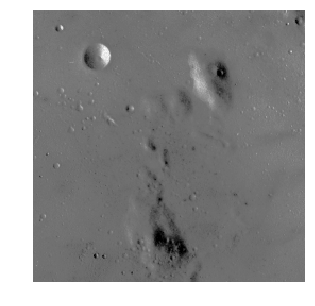

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.imshow(im, cmap="gray")
plt.axis('off')
plt.show()

Sprawdzenie podstawowych parametrów obrazu: wymiary, typ kodowania luminancji (koloru) oraz rozmiar.

In [5]:
print(im.shape, im.dtype, im.size)

(512, 512) uint8 262144


Przykład prostej manipulacji punktami na obrazie. Wykreślenie linii pod kątem $-45^\circ$ w kolorze białym.

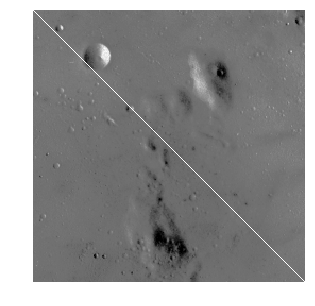

In [6]:
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if i==j:
            im[i,j] = 255

        
plt.figure(figsize=(5,5))
plt.imshow(im, cmap="gray")
plt.axis('off')
plt.show()

Weryfikacja podstawowych parametrów obrazu wyjściowego.

In [7]:
print(im.min(), im.max())
print(im.dtype)

0 255
uint8


Wyznaczanie histogramu obrazu za pomocą funkcji **histogram** z modułu **exposure**.

Prezentacja w postaci wykresu liniowego oraz słupkowego dla obrazu z wewnętrzną reprezentacją luminancji w zakresie całkowitym jednobajtowym tj. $[0, 255]$.

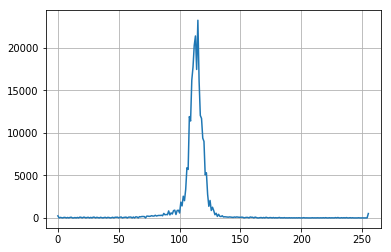

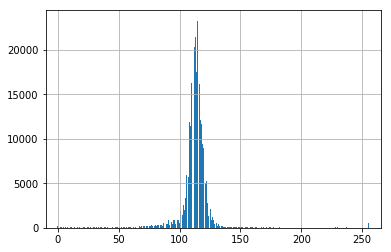

In [8]:
from skimage import exposure

histogram = exposure.histogram(im, nbins=256)
hist, cbins = histogram

plt.plot(cbins, hist)
plt.xlim([-10, 265])
plt.grid()
plt.show()

plt.bar(cbins, hist)
plt.xlim([-10, 265])
plt.grid()
plt.show()

Poziomy luminancji uwzględniane przez histogram.

In [9]:
print('Liczba poziomów: ', len(cbins), '\n')
print(cbins)

Liczba poziomów:  256 

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 24

Wyznaczanie histogramu obrazu za pomocą funkcji **histogram** z modułu **exposure**.

Prezentacja w postaci wykresu liniowego oraz słupkowego dla obrazu z wewnętrzną reprezentacją luminancji w zakresie rzeczywistym tj. $[0, 1]$. Konwersja pomiędzy reprezentacją typu **uint8** a **float64** jest możliwa za pomoca wbudowanych funkcji transformujących m.in. **img_as_float** i **img_as_ubyte** (szczegóły w [dokumentacji](http://scikit-image.org/docs/dev/api/skimage.html)).

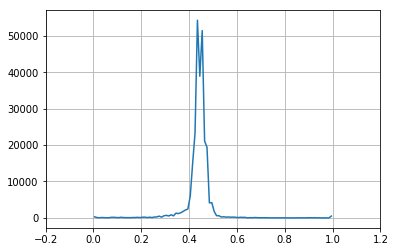

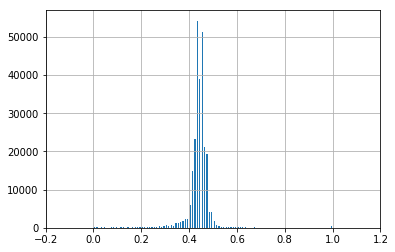

In [10]:
from skimage import img_as_float

imf = img_as_float(im)
nbins = 100

histogram = exposure.histogram(imf, nbins=nbins)
hist, cbins = histogram

plt.plot(cbins, hist)
plt.xlim([-0.2, 1.2])
plt.grid()
plt.show()

plt.bar(cbins, hist, width=0.005)
plt.xlim([-0.2, 1.2])
plt.grid()
plt.show()

Poziomy luminancji uwzględniane przez histogram.

In [11]:
print(imf.dtype)
print('Liczba poziomów: ', len(cbins), '\n')
print(cbins)

float64
Liczba poziomów:  100 

[0.005 0.015 0.025 0.035 0.045 0.055 0.065 0.075 0.085 0.095 0.105 0.115
 0.125 0.135 0.145 0.155 0.165 0.175 0.185 0.195 0.205 0.215 0.225 0.235
 0.245 0.255 0.265 0.275 0.285 0.295 0.305 0.315 0.325 0.335 0.345 0.355
 0.365 0.375 0.385 0.395 0.405 0.415 0.425 0.435 0.445 0.455 0.465 0.475
 0.485 0.495 0.505 0.515 0.525 0.535 0.545 0.555 0.565 0.575 0.585 0.595
 0.605 0.615 0.625 0.635 0.645 0.655 0.665 0.675 0.685 0.695 0.705 0.715
 0.725 0.735 0.745 0.755 0.765 0.775 0.785 0.795 0.805 0.815 0.825 0.835
 0.845 0.855 0.865 0.875 0.885 0.895 0.905 0.915 0.925 0.935 0.945 0.955
 0.965 0.975 0.985 0.995]


Skalowanie obrazów i wykresów.

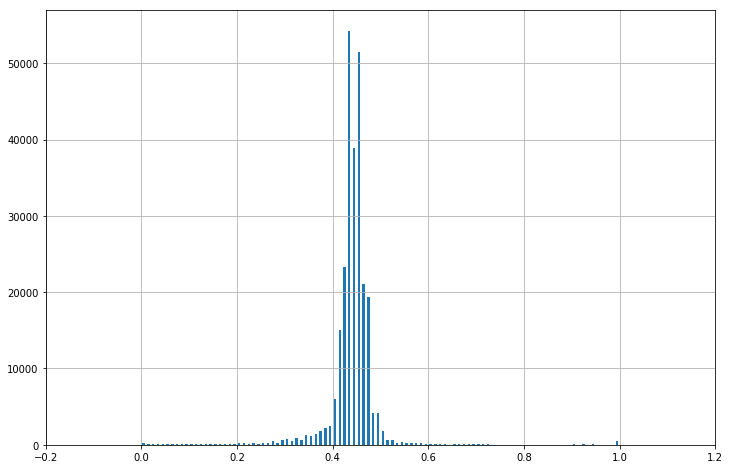

In [12]:
scale = 2.0
fig = plt.figure() 
default_size = fig.get_size_inches() 
fig.set_size_inches((default_size[0]*scale, default_size[1]*scale))

plt.bar(cbins, hist, width=0.005)
plt.xlim([-0.2, 1.2])
plt.grid()
plt.show()

Inne funkcje pozwalające na wyznaczanie histogramu.

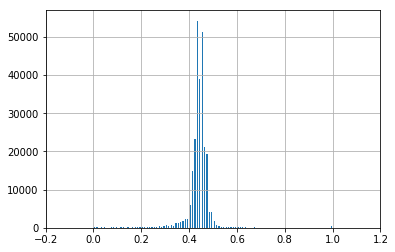

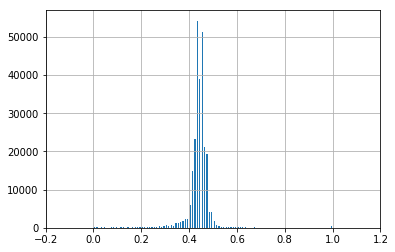

In [13]:
nhistogram = np.histogram(imf, 100)

nhist, ncbins = nhistogram
bins = [item/(10.0*nbins) for item in range(5,1000,10)]

plt.bar(bins, nhist, width=0.005)
plt.xlim([-0.2, 1.2])
plt.grid()
plt.show()

plt.bar(cbins, hist, width=0.005)
plt.xlim([-0.2, 1.2])
plt.grid()
plt.show()

Bezpośrednie wyznaczanie środków przedziałów luminancji czyli dziedziny histogramu obliczonego dla obrazu z kodowaniem typu **float64**.

In [14]:
nbins = 20
step = 1/nbins
start = step/2
pp = np.linspace(0, 1, nbins, endpoint=False)+start
print(pp, len(pp))

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975] 20


Operacja wyrównywania histogramu.



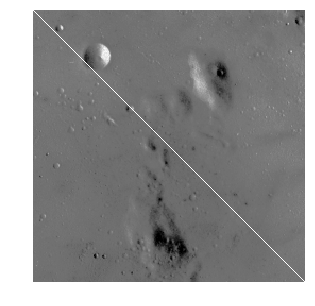

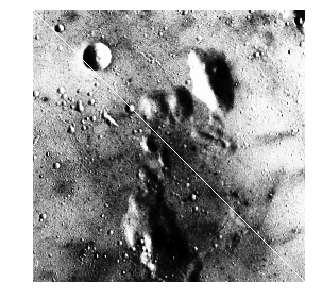

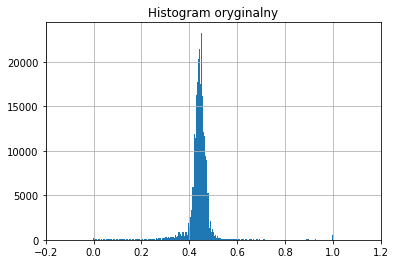

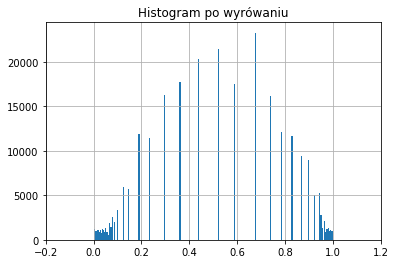

In [15]:
imeq = exposure.equalize_hist(imf, nbins=256)

plt.figure(figsize=(5,5))
plt.imshow(im, cmap="gray")
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(imeq, cmap="gray")
plt.axis('off')
plt.show()

histogram = exposure.histogram(imf, nbins=256)
ohist, ocbins = histogram

plt.bar(ocbins, ohist, width=0.005)
plt.xlim([-0.2, 1.2])
plt.title('Histogram oryginalny')
plt.grid()
plt.show()

histogram = exposure.histogram(imeq, nbins=256)
ehist, ecbins = histogram

plt.bar(ecbins, ehist, width=0.005)
plt.xlim([-0.2, 1.2])
plt.title('Histogram po wyrówaniu')
plt.grid()
plt.show()

Sprawdzenie czy histogramy mają identyczny wymiar.

In [16]:
print(len(ohist), len(ehist))

256 256


Definicja funkcji obliczającej dystrybuantę (ang. Cumulative Distribution Function) dla zadanego histogramu obrazu.

Zakładając, że $n_i$ oznacza liczbę punktów o poziomie luminacji $i$ na obrazie $X = {x}$, gdzie zakres luminacji (odcieni szarości) zawiera się w zakresie $0 < i < L$.

W takim przypadku prawdopodobieństwo wystąpienia punktu o poziomie jasności $i$ definuje się jako: 

$$ p_{x}(i) = p(x = i) = \frac{n_i}{n}$$.

gdzie: $L$ określa całkowitą liczbę odcieni szarości na danym obrazie, $n$ określa całkowitą liczbę pikseli na obrazie, a $p_{x}(i)$ określa wartość histogramu obrazu (znormalizowaną do zakresu $[0,1]$) odpowiadającą pikselowi o wartości $i$.

Dla tak zdefiniowanych parametrów możemy zdefiniowac dystrybuantę postaci:

$$ cdf_{x} (i) = \sum_{j=0}^{i} p_{x}(j)$$

Operacja wyrównania histogramu polega na takiej transformacji $y = T(x)$, aby w efekcie uzyskać nowy obraz $Y = {y}$, dla którego dystrybuanta ma podlegać lineryzacji przez cały zakres wartości.

$$ cdf_{y} (i) = iK$$ 
$$K \in \mathbb{R}$$

In [17]:
def computeCDF(hist):
    cdf = np.zeros(hist.size)
    
    for idx in range(hist.size):
        cdf[idx] = np.sum(hist[:idx+1])
    
    return cdf

Obliczenie dysrtybuant dla histogramów.

In [18]:
ocdf = computeCDF(ohist)
ecdf = computeCDF(ehist)


Wykresy ilustrujące róznicę pomiędzy histogramem przed i po przekształceniu.

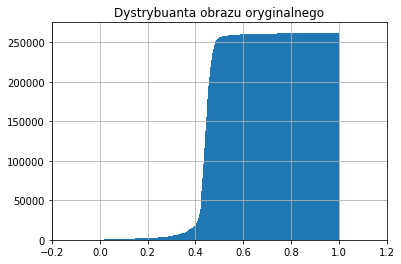

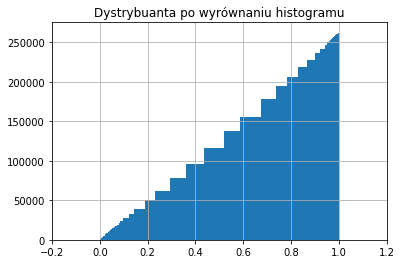

In [19]:
plt.bar(ocbins, ocdf, width=0.005)
plt.xlim([-0.2, 1.2])
plt.title('Dystrybuanta obrazu oryginalnego')
plt.grid()
plt.show()

plt.bar(ecbins, ecdf, width=0.005)
plt.xlim([-0.2, 1.2])
plt.title('Dystrybuanta po wyrównaniu histogramu')
plt.grid()
plt.show()